In [1]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
%store -r data
%store -r target

In [2]:
# print(data)

In [3]:
data = standardize(data)
X_dev, y_dev, X_test, y_test, X_train, y_train, X_val, y_val = split(data,target)

X_train shape: (810, 54)
X_test shape: (100, 54)
X_val shape: (90, 54)


In [4]:
model_rf = RandomForestClassifier(max_depth=2,n_estimators=200)
model_rf.fit(X_train, y_train)
predsTrainrf = model_rf.predict(X_train)
predsTestrf = model_rf.predict(X_test)

In [5]:
testrf_score =  accuracy_score(y_test, predsTestrf)
trainrf_score = accuracy_score(y_train, predsTrainrf)

In [6]:
print("Classification Score for Random Forest on Train dataset:\n")
print("Train Score : ", trainrf_score)
print("--------------------------------------------------------")
print("Classification Score for Random Forest on Test dataset:\n")
print("Test Score :", testrf_score)

Classification Score for Random Forest on Train dataset:

Train Score :  0.5061728395061729
--------------------------------------------------------
Classification Score for Random Forest on Test dataset:

Test Score : 0.46


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


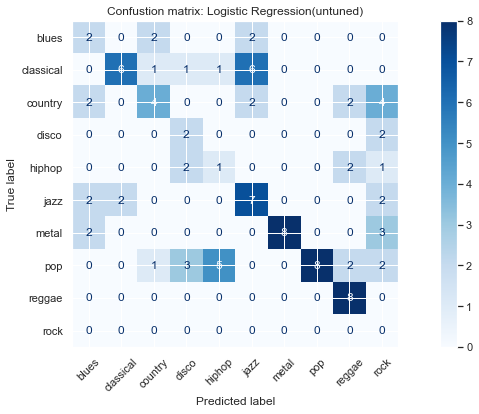

Accuracy : 0.46
Macro F-1 Score : 0.42


In [7]:
# Evaluate Model
class_labels = list(model_rf.classes_)
macro_f1, accuracy = cm(predsTestrf, y_test, class_labels, 'Confustion matrix: Random Forest(untuned)')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

In [8]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=28)
# fit on data
pca_data = pca.fit_transform(X_train)
pca_data_test = pca.transform(X_test)
pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_train.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_train], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance of each component: [0.26949307 0.16364606 0.10789253 0.07105924 0.05390671 0.03870074
 0.02716028 0.02441186 0.02238435 0.01826649 0.01428457 0.01387668
 0.0122859  0.01134924 0.01001135 0.00967402 0.00897503 0.00781174
 0.00772563 0.0072399  0.00691391 0.00660736 0.00604778 0.00566022
 0.00510951 0.00494513 0.00484711 0.00470158]
Sum of Explained Variance: 0.9434528215271792


In [9]:
pca_final.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,label
0,0.266836,-0.112776,-0.344761,-0.254416,0.057752,-0.072691,0.189866,0.052621,-0.128159,0.020941,...,0.051523,0.008726,-0.064703,0.112224,-0.025269,0.030505,-0.018422,-0.040685,0.034870,country
1,0.156225,-0.636213,-0.446540,-0.137086,-0.106536,0.277522,0.037830,-0.320880,0.045701,-0.061327,...,-0.020670,-0.083695,-0.053921,0.030614,0.066042,0.029601,0.022042,0.037408,0.104528,jazz
2,0.393931,0.389079,-0.330955,-0.114426,0.325262,-0.045646,-0.217117,-0.054421,-0.170743,-0.165928,...,0.080229,0.144966,-0.034850,-0.055738,-0.097207,-0.010964,0.002227,0.063015,0.061212,pop
3,0.333776,-0.602051,-0.292336,0.430237,-0.137969,-0.056124,0.084354,-0.074581,-0.062451,0.123716,...,0.108498,-0.014322,-0.120816,0.028130,-0.018814,0.071334,-0.045810,0.124265,-0.031286,classical
4,0.041418,-0.312458,0.174340,0.282535,-0.252030,-0.074260,-0.158998,0.176812,-0.036037,0.110432,...,-0.109966,-0.010146,0.044809,-0.041269,0.032041,0.038215,-0.002117,0.059425,-0.034406,jazz


In [10]:
# from sklearn.preprocessing import OrdinalEncoder
# encoder  = OrdinalEncoder()
# encoder.fit(pca_final.iloc[:,10].reshape(-1, 1))
# y_train_encoded = encoder.transform(pca_final.iloc[:,10])

In [11]:
model_pca = RandomForestClassifier(max_depth=2,n_estimators=1000)
model_pca.fit(pca_final.iloc[:,:28],pca_final.iloc[:,28])
pcaTrainrf = model_pca.predict(pca_data)
pcaTestrf = model_pca.predict(pca_data_test)

In [12]:
pcatestrf_score =  accuracy_score(y_test, pcaTestrf)
pcarf_score = accuracy_score(y_train, pcaTrainrf)

In [13]:
print("Classification Score for Random Forest on Train dataset:\n")
print("Train Score : ", pcarf_score)
print("--------------------------------------------------------")
print("Classification Score for Random Forest on Test dataset:\n")
print("Test Score :", pcatestrf_score)

Classification Score for Random Forest on Train dataset:

Train Score :  0.6074074074074074
--------------------------------------------------------
Classification Score for Random Forest on Test dataset:

Test Score : 0.49


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


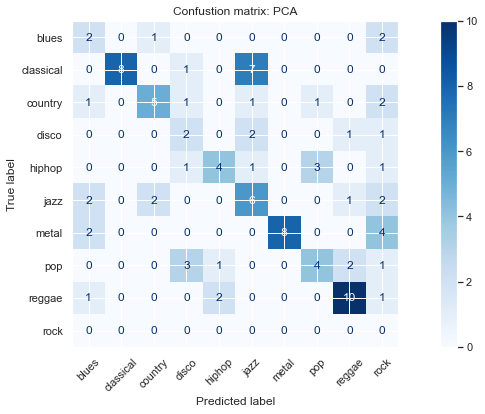

Accuracy : 0.49
Macro F-1 Score : 0.45


In [14]:
# Evaluate Model
class_labels = list(model_rf.classes_)
macro_f1, accuracy = cm(pcaTestrf, y_test, class_labels, 'Confustion matrix: PCA')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)